# Scatter Plot with Color Palette 

Developed by A. R. Azari - 3/5/2019

This notebook demonstrates for example random data, the scatter plot seen within [Azari et al. 2018](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018JA025391) Figure 8. 

- Azari, A. R., Liemohn, M. W., Jia, X., Thomsen, M. F., Mitchell, D. G., Sergis, N., et al. (2018). Interchange injections at Saturn: Statistical survey of energetic H+ sudden flux intensifications. Journal of Geophysical Research: Space Physics, 123, 4692–4711. https://doi.org/10.1029/2018JA025391

## Part 1. Importing and Setting up Environments

In [1]:

#import the required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

#set up environment
%matplotlib inline

#set our random seed for consistency
randomSeedValue = 3000
np.random.seed(randomSeedValue)

#set up plotting variables
labelSize = 22

#declare our color scales
colorScale       = ['#abd9e9','#ffffbf','#fdae61','#f46d43']
colorScaleStrong = ['#008dbf','#eaea41','#f07600','#c93a0d']


## Part 2. Setting up Example Data

In [2]:
#make random data and fill with np.nan's
length = 500
numColumns = 3

#set up nan data frame
data = pd.DataFrame(data = np.full([length, numColumns], np.nan), columns = ['X', 'Y', 'Type'])


#set random assignment to the type column
data['Type'] = np.random.randint(0, 4, data.shape[0])

#and now set up for the different types the x and y values
for t in data['Type'].unique():
    print('Filling in dataframe X and Y for type {}'.format(t))
    
    #set up the dataframe
    index = (data['Type'] == t)
    #make the x's dense near the 4.5 mark
    centerLocation = 4.5
    data.loc[index, 'X'] = np.random.normal(centerLocation, 1, np.sum(index))
    
    scale = 0.5*(t+1)

    data.loc[index, 'Y'] = norm.pdf(data.loc[index, 'X'],
                                    centerLocation, scale) + np.random.normal(0, 0.1, np.sum(index))
    

Filling in dataframe X and Y for type 0
Filling in dataframe X and Y for type 3
Filling in dataframe X and Y for type 1
Filling in dataframe X and Y for type 2


## Part 3. Making Scatter Plot

Plotting for type 0
Plotting for type 1
Plotting for type 2
Plotting for type 3


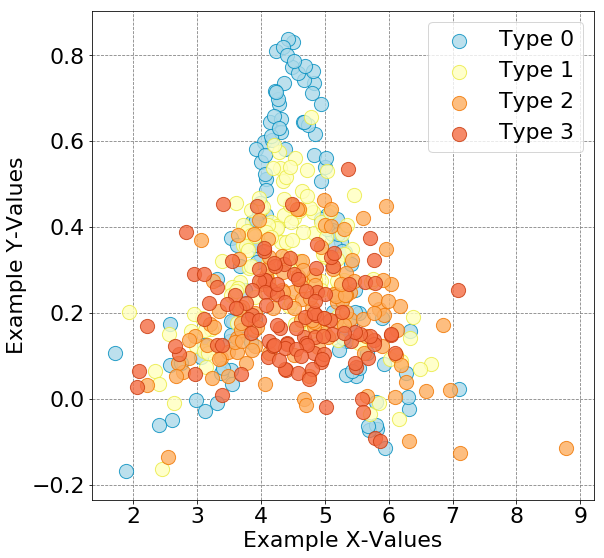

In [3]:

#set up figure and sub grids - 
#using ax for easy syntax
fig = plt.figure(figsize=(9, 9))
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.9)
ax = fig.add_subplot(gs[0,0])


#look over the types and plot a scatter plot with colors
#set up above
for t in sorted(data['Type'].unique()):
    
    #handy print statement for error checking
    print('Plotting for type {}'.format(t))
    
    #set up the index
    index = (data['Type'] == t)
    
    #just a nice area - can be augmented as needed
    area = np.pi*(8)**2  

    ax.scatter(data.loc[index, 'X'], data.loc[index, 'Y'], 
               s = area, c = colorScale[t], edgecolor = colorScaleStrong[t], 
               alpha=0.8, label = 'Type {}'.format(t))


#set up the grid and the location of the grid
ax.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)

#set up labels for axis
ax.legend(prop={'size':labelSize})

#set up labels for axis
ax.set_xlabel('Example X-Values', fontsize = labelSize)
ax.set_ylabel('Example Y-Values', fontsize = labelSize)



#set up scaling for tick labels
plt.xticks(fontsize = labelSize)
plt.yticks(fontsize = labelSize);

plt.savefig('./Figures/ExampleScatter.png')